# Transient Angle

Please check https://pyramses.sps-lab.org/ for the documentation.

In [1]:
import pyramses
import os

Prepare the case study (check https://pyramses.sps-lab.org/interface/case.html):

In [2]:
case = pyramses.cfg()
case.addOut('output.trace') # save the simulation output
case.addData('dyn.dat') # Dynamic data
case.addData('lf1solv.dat') # power-flow data
case.addData('solveroptions.dat') # solver settings
case.addInit('init.trace') # save initialization procedure
case.addDst('nothing.dst') # description of disturbance
case.addCont('cont.trace') # save continuous trace
case.addDisc('disc.trace') # save discrete trace
case.addObs('obs.dat')
case.addTrj('output.trj')

Clear all the previous simulation files:

In [3]:
for item in os.listdir('.'):
    if item.endswith(('.trace', '.trj')):
        os.remove(os.path.join('.', item))

Start the simulator (check https://pyramses.sps-lab.org/interface/simul.html):

In [4]:
ram = pyramses.sim()
try:
    ram.execSim(case,0.0)
except:
    print(ram.getLastErr()) 

Add a disturbance:

In [5]:
ram.addDisturb(1.00, 'FAULT BUS 3 0 0 ')
ram.addDisturb(1.1, 'CLEAR BUS 3 ')
ram.addDisturb(1.1, 'BREAKER BRANCH 1-3 0 0 ')

0

Simulate until T (check https://pyramses.sps-lab.org/interface/simul.html):

In [6]:
try:
    ram.contSim(20.0) 
    ram.endSim()
except:
    print(ram.getLastErr())   

Uncomment to see the log file:

In [7]:
#print(open(case.getOut()).read())

Get the results and plot the voltage evolution (check https://pyramses.sps-lab.org/interface/extractor.html):

In [8]:
ext = pyramses.extractor(case.getTrj())

Plot the generator active power

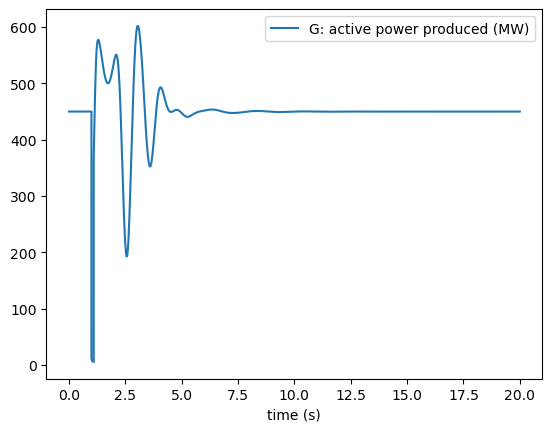

In [9]:
ext.getSync('G').P.plot()

Plot the generator reactive power

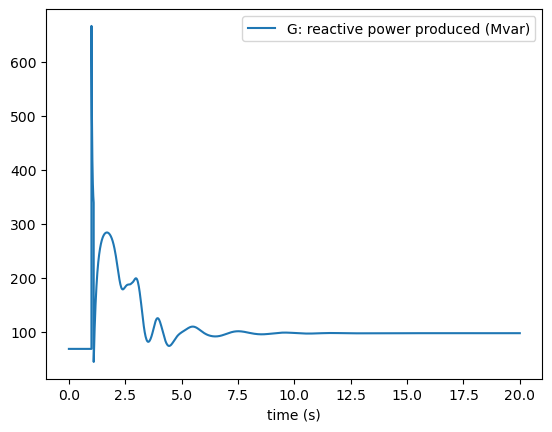

In [10]:
ext.getSync('G').Q.plot()

Plot the generator rotor angle

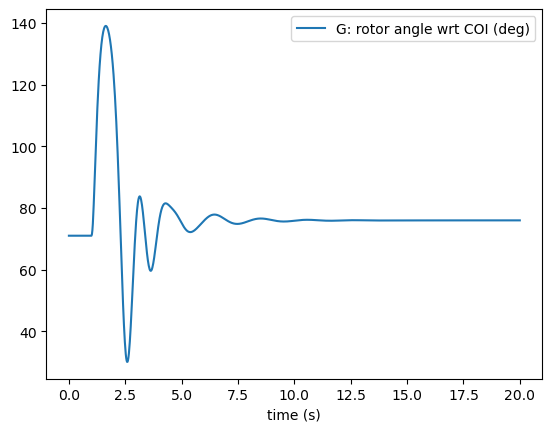

In [11]:
ext.getSync('G').A.plot()

Plot the generator field current

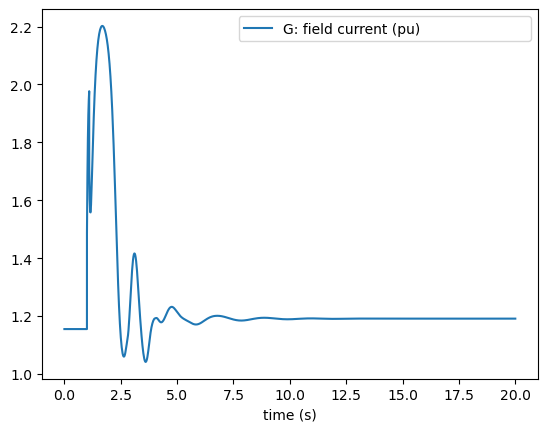

In [12]:
ext.getSync('G').FC.plot()

Plot the control valve z of the turbine

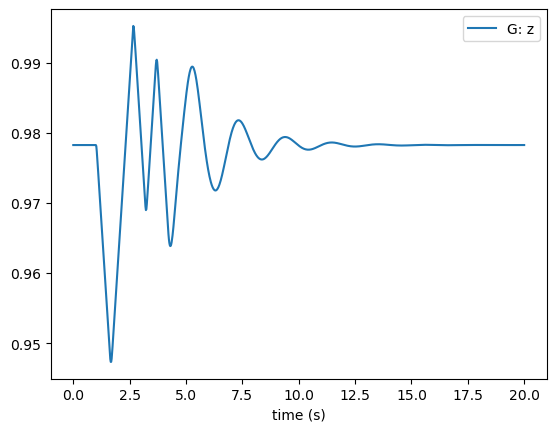

In [13]:
ext.getTor('G').z.plot()

Plot the voltage magnitude at bus 3

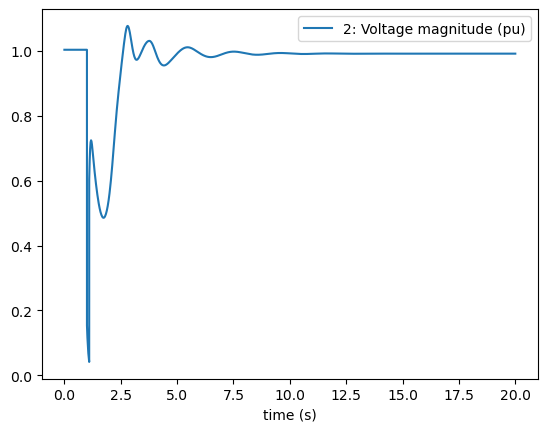

In [14]:
ext.getBus('2').mag.plot()

In [15]:
angle = ext.getSync('G').A

In [16]:
speed = ext.getSync('G').S

Plot ω-δ 

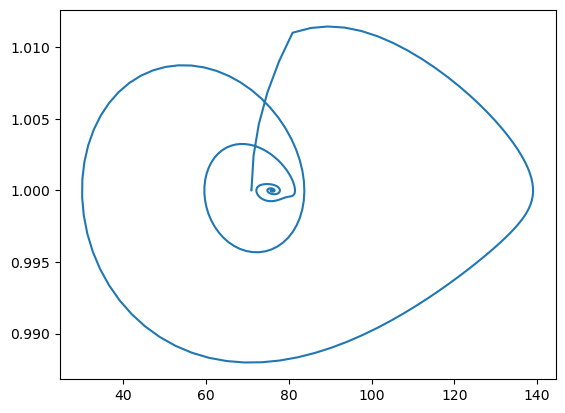

In [17]:
import matplotlib.pyplot as plt
plt.plot(angle.value, speed.value)
plt.show()